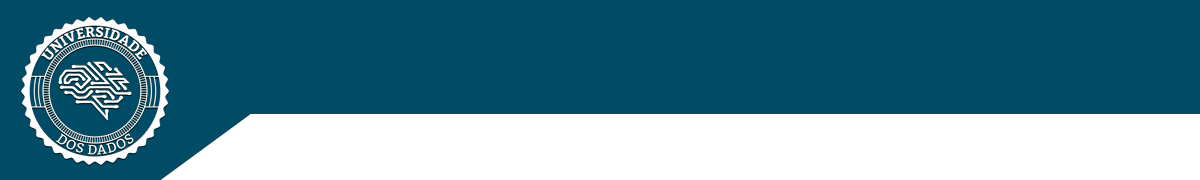

# Universidade dos Dados
GitHub: http://www.github.com/unidados/

Site de dicas: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

Curta a nossa página no Facebook e fique por dentro das atualizações: <a href=http://facebook.com/universidadedosdados>Universidade dos Dados</a>

# Tratando valores nulos (NaN)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file="C:\\projetos\\ufo.csv"
ufo = pd.read_csv(file)

In [ ]:
#Utilizando o tail (inverso do head)

ufo.tail(10)

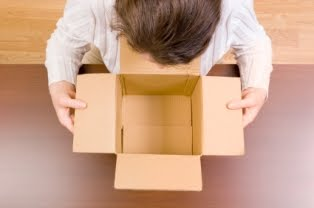

- "NaN" não é uma string. Ele é um valor especial do numpy: **numpy.nan**
- É comum a referência "Not a number", que significa **missing value**
- O método ***read_csv*** detecta valores nulos automaticamente e preenche com NaN na leitura do arquivo

# O isnull() retorna um Dataframe boleano, onde True indica valor nulo e False valor preenchido

In [ ]:
#No arquivo null, os valores ímpares são nulos

file="C:\\projetos\\nulos.csv"
nulos = pd.read_csv(file)

In [ ]:
nulos.isnull().tail()

In [ ]:
ufo.isnull().tail()

# notnull() é exatamente o oposto do isnull()

In [ ]:
nulos.notnull().tail()

In [ ]:
ufo.notnull().tail()

## E como saber a quantidade de valores nulos em uma coluna?

In [ ]:
ufo.isnull().sum()

### Como o isnull().sum() funciona?

Lembram que o ***isnull()*** retorna verdadeiro ou falso? O retorno verdadeiro ou falso é convertido pelo Pandas em 0 para falso e 1 para verdadeiro. Então o método ***sum()*** agrega os valores das colunas, pois ele ***opera por padrão no eixo 0.***

# Construindo um filtro de valores nulos

In [ ]:
#Estamos verificando as linhas em que a coluna City possui valor nulo

ufo[ufo.City.isnull()].head(20)

In [ ]:
#Numero de linhas e colunas
A = ufo.shape
A

# dropna()

### any - Se qualquer valor estiver faltando na linha, então o dropna APAGA a linha

In [ ]:
B = ufo.dropna(how='any').shape
B

In [ ]:
#O retorno do shape é uma tupla

print('Deletadas ' + str((A[0] - B[0])) + ' linhas com valores nulos')

In [ ]:
#O inplace também é um parametro do dropna e é falso por padrão.

ufo.dropna(how='any').shape

In [ ]:
#As linhas com NaN continuam no Dataframe

ufo.shape

### all - O all funciona da seguinte forma: Caso todos os valores de uma linha sejam nulo, ela será deletada

In [ ]:
ufo.dropna(how='all').shape

### Utilizando o dropna com parâmetros

***O parametro subset recebe uma lista***

In [ ]:
#Estamos criando um subset com City e Shape Reported. Se houver qualquer valor nulo nessas colunas, a linha será deletada.

ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

In [ ]:
#Se todos os valores estiverem nulos em City ou Shape Reported, as linhas serão deletadas
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

***Como trabalha o parâmetros how()***

- O any funciona como um or ou |
- O all funciona como um and ou &

### value_counts realiza um count, porém não conta os valores NaN

In [ ]:
ufo['Shape Reported'].value_counts().head()

In [ ]:
#Podemos incluir os valores NaN
ufo['Shape Reported'].value_counts(dropna=False).head()

In [ ]:
#Podemos ainda preencher os valores que estão faltando
ufo['Shape Reported'].fillna(value='DIVERSOS', inplace=True)

In [ ]:
#Confirmando a contagem incluindo o valor DIVERSOS
ufo['Shape Reported'].value_counts().head()

# E a coca???
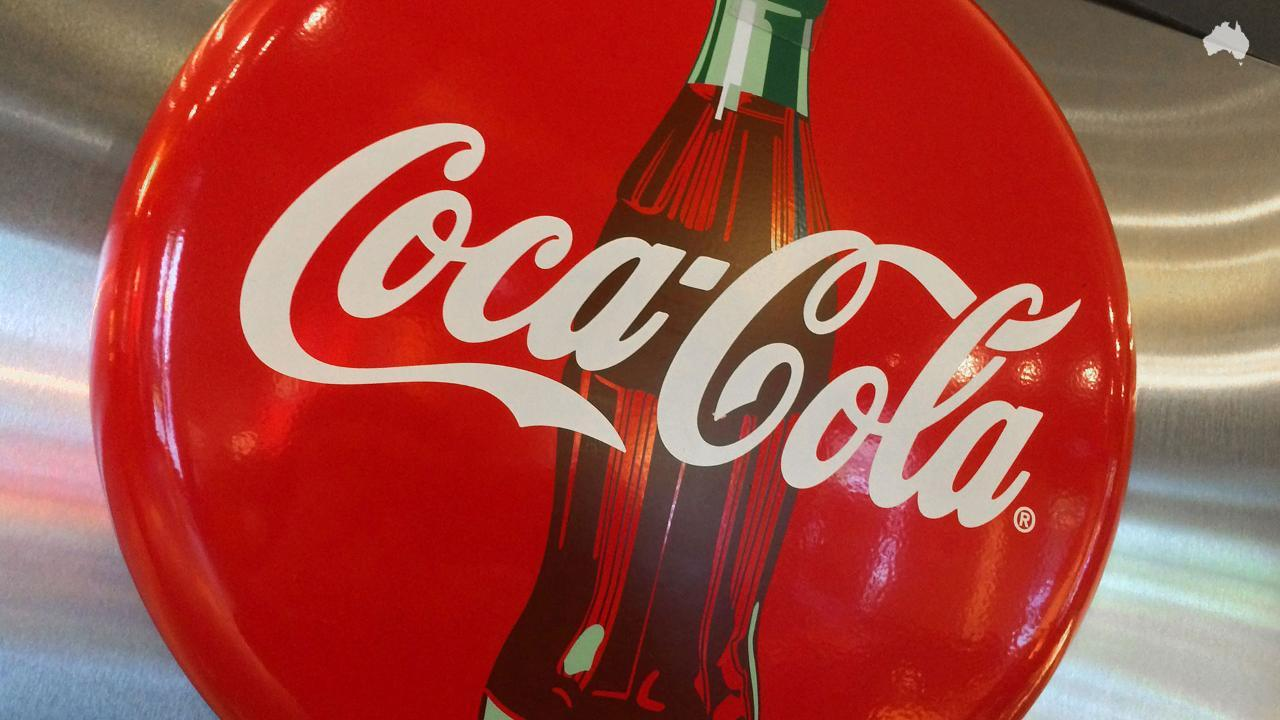

In [ ]:
arquivo = "C:\\projetos\\sanduiches.txt"
vendas = pd.read_table(arquivo)
vendas.head()

In [ ]:
vendas.shape

In [ ]:
#Apagando os valores as linhas com valores nulos em descrição

ordens = vendas.dropna(subset=['choice_description'], how='any')

In [ ]:
ordens.shape

In [ ]:
ordens.head(10)

In [ ]:
ordens.choice_description.str.contains('Coke').sum()

# E quantos pratos tem Guacamole?

In [ ]:
ordens.choice_description.str.contains('Guacamole').astype(int).sum()

# E quantos pratos tem arroz?

In [ ]:
ordens.choice_description.str.contains('Rice').astype(int).sum()